#### Import Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,r2_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

#### Import Dataset

In [140]:
data=pd.read_csv('baseball.csv')

#### Print the data

In [141]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#### Checking Keys

In [142]:
data.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Checking Shape

In [143]:
data.shape

(30, 17)

In [144]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Checking Datatypes

In [145]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#### Printing the complete information

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [147]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Checking for null values()

In [148]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

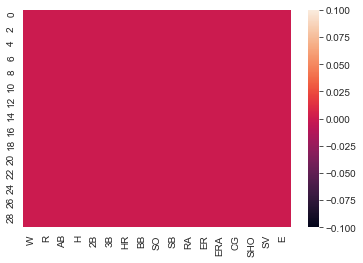

In [149]:
sns.heatmap(data.isnull())

#### Drawing heatmap

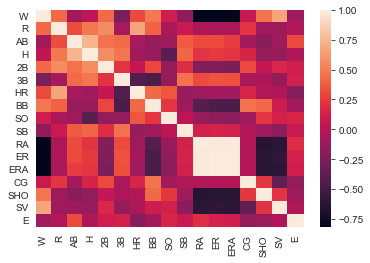

In [150]:
#plt.figure(figsize=(10,3))
sns.heatmap(data.corr())

In [151]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


#### Checking the skewness of the data

In [152]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

#### Checking for the outlier

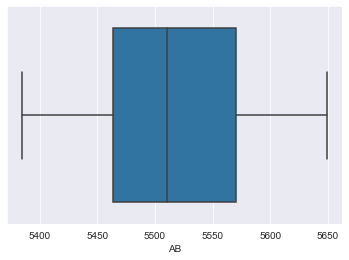

In [153]:
sns.boxplot(data['AB'])

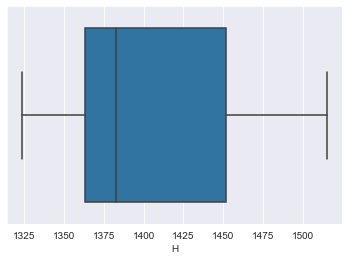

In [154]:
sns.boxplot(data['H'])

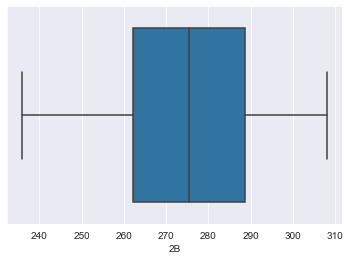

In [155]:
sns.boxplot(data['2B'])

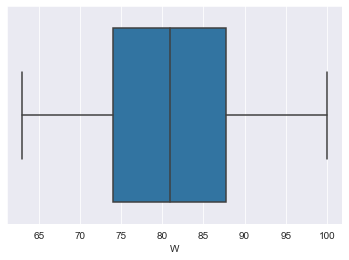

In [156]:
sns.boxplot(data['W'])

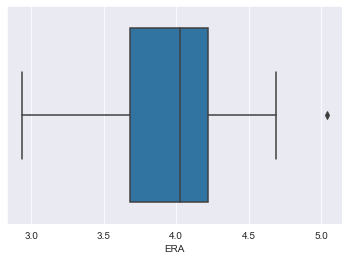

In [157]:
sns.boxplot(data['ERA'])

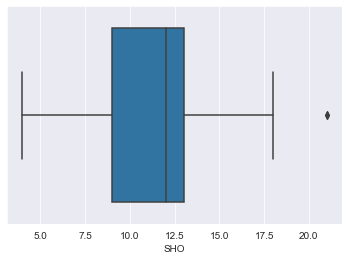

In [158]:
sns.boxplot(data['SHO'])

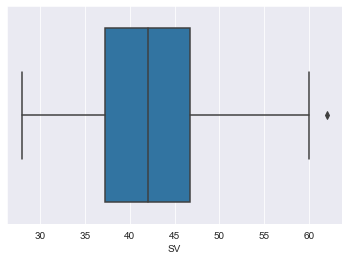

In [159]:
sns.boxplot(data['SV'])

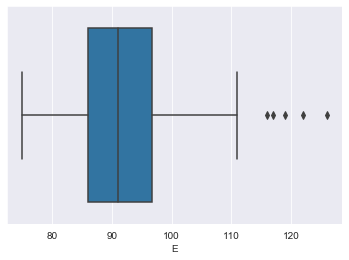

In [160]:
sns.boxplot(data['E'])

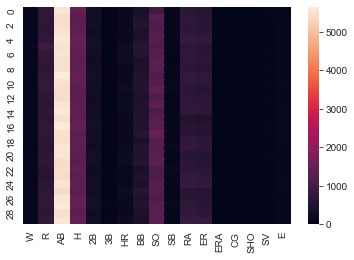

In [161]:
sns.heatmap(data)

#### Checking for Outliers

In [162]:
from scipy.stats import zscore
data['p']=zscore(data['ERA'])
data['q']=zscore(data['SHO'])
data['r']=zscore(data['SV'])
data['s']=zscore(data['E'])
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,...,ER,ERA,CG,SHO,SV,E,p,q,r,s
0,95,724,5575,1497,300,42,139,383,973,104,...,601,3.73,2,8,56,88,-0.506955,-0.814629,1.671607,-0.461470
1,83,696,5467,1349,277,44,156,439,1264,70,...,653,4.07,2,12,45,86,0.254598,0.172800,0.249879,-0.607197
2,81,669,5439,1395,303,29,141,533,1157,86,...,584,3.67,11,10,38,79,-0.641347,-0.320914,-0.654856,-1.117242
3,76,622,5533,1381,260,27,136,404,1231,68,...,643,3.98,7,9,37,101,0.053010,-0.567771,-0.784104,0.485758
4,74,689,5605,1515,289,49,151,455,1259,83,...,746,4.64,7,12,35,86,1.531318,0.172800,-1.042600,-0.607197


#### Remove Insignificant Columns

In [163]:
data.drop(['ERA','SHO','SV','E'],axis=1, inplace = True)
data.drop(['p','q','r','s'],axis=1, inplace = True)


In [164]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG
0,95,724,5575,1497,300,42,139,383,973,104,641,601,2
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,2
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,11
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,7
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,7
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,7
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,3
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,0
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,1
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,3


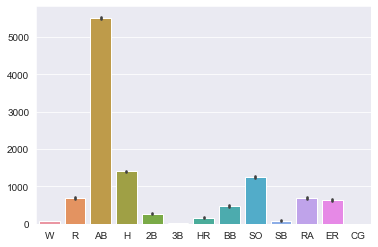

In [165]:
sns.barplot(data=data)

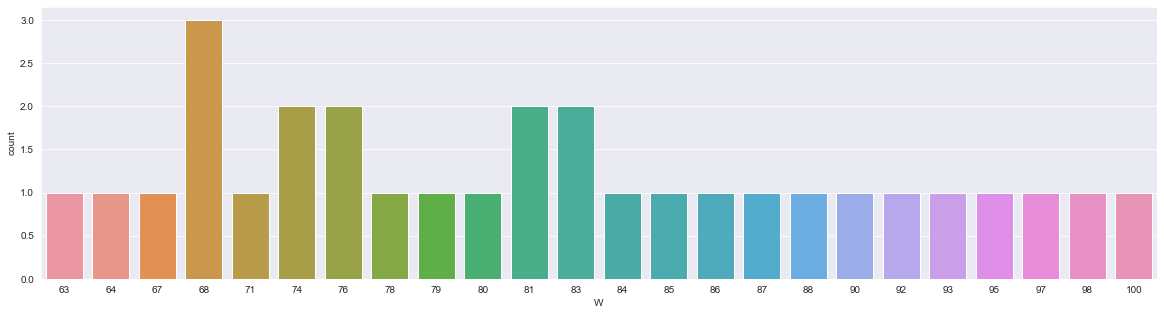

In [166]:
plt.figure(figsize=(20,5))
sns.countplot(data['W'])

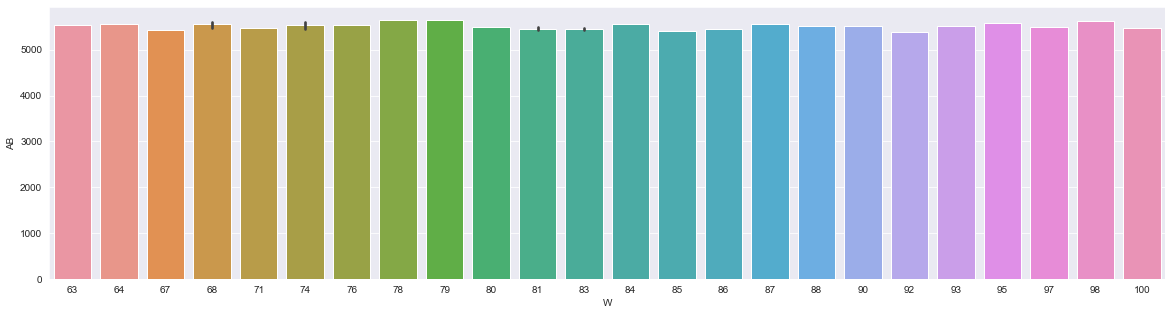

In [167]:
plt.figure(figsize=(20,5))
sns.barplot(x='W',y='AB',data=data)

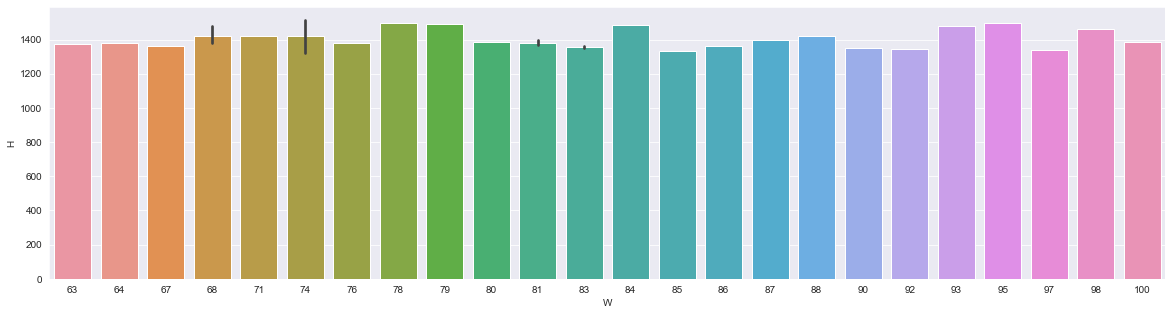

In [168]:
plt.figure(figsize=(20,5))
sns.barplot(x='W',y='H',data=data)

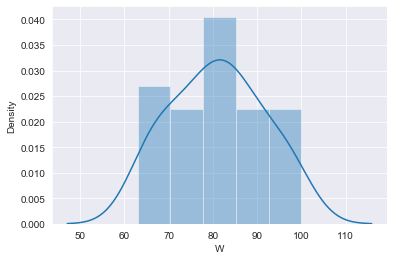

In [170]:
sns.set_style('darkgrid')

sns.distplot(data['W'],kde=True)

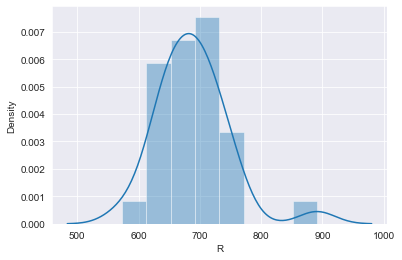

In [171]:
sns.distplot(data['R'],kde=True)

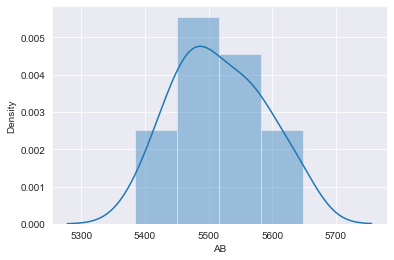

In [172]:
sns.distplot(data['AB'],kde=True)

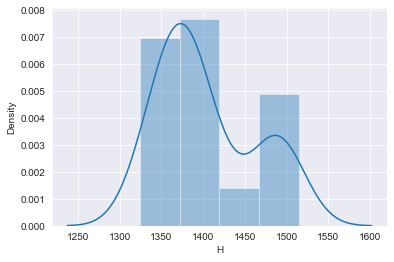

In [173]:
sns.distplot(data['H'],kde=True)

#### Normalizing the data

In [176]:
from sklearn import preprocessing

data1=preprocessing.normalize(data)
scale_data=pd.DataFrame(data1)
scale_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.015868,0.120932,0.931209,0.250048,0.050110,0.007015,0.023218,0.063974,0.162523,0.017371,0.107068,0.100387,0.000334
1,0.014027,0.117622,0.923908,0.227977,0.046812,0.007436,0.026364,0.074190,0.213613,0.011830,0.118298,0.110355,0.000338
2,0.013795,0.113937,0.926315,0.237582,0.051604,0.004939,0.024014,0.090775,0.197048,0.014647,0.108998,0.099461,0.001873
3,0.012740,0.104264,0.927478,0.231492,0.043583,0.004526,0.022797,0.067721,0.206348,0.011399,0.117506,0.107784,0.001173
4,0.012116,0.112814,0.917737,0.248059,0.047320,0.008023,0.024724,0.074500,0.206143,0.013590,0.131479,0.122147,0.001146


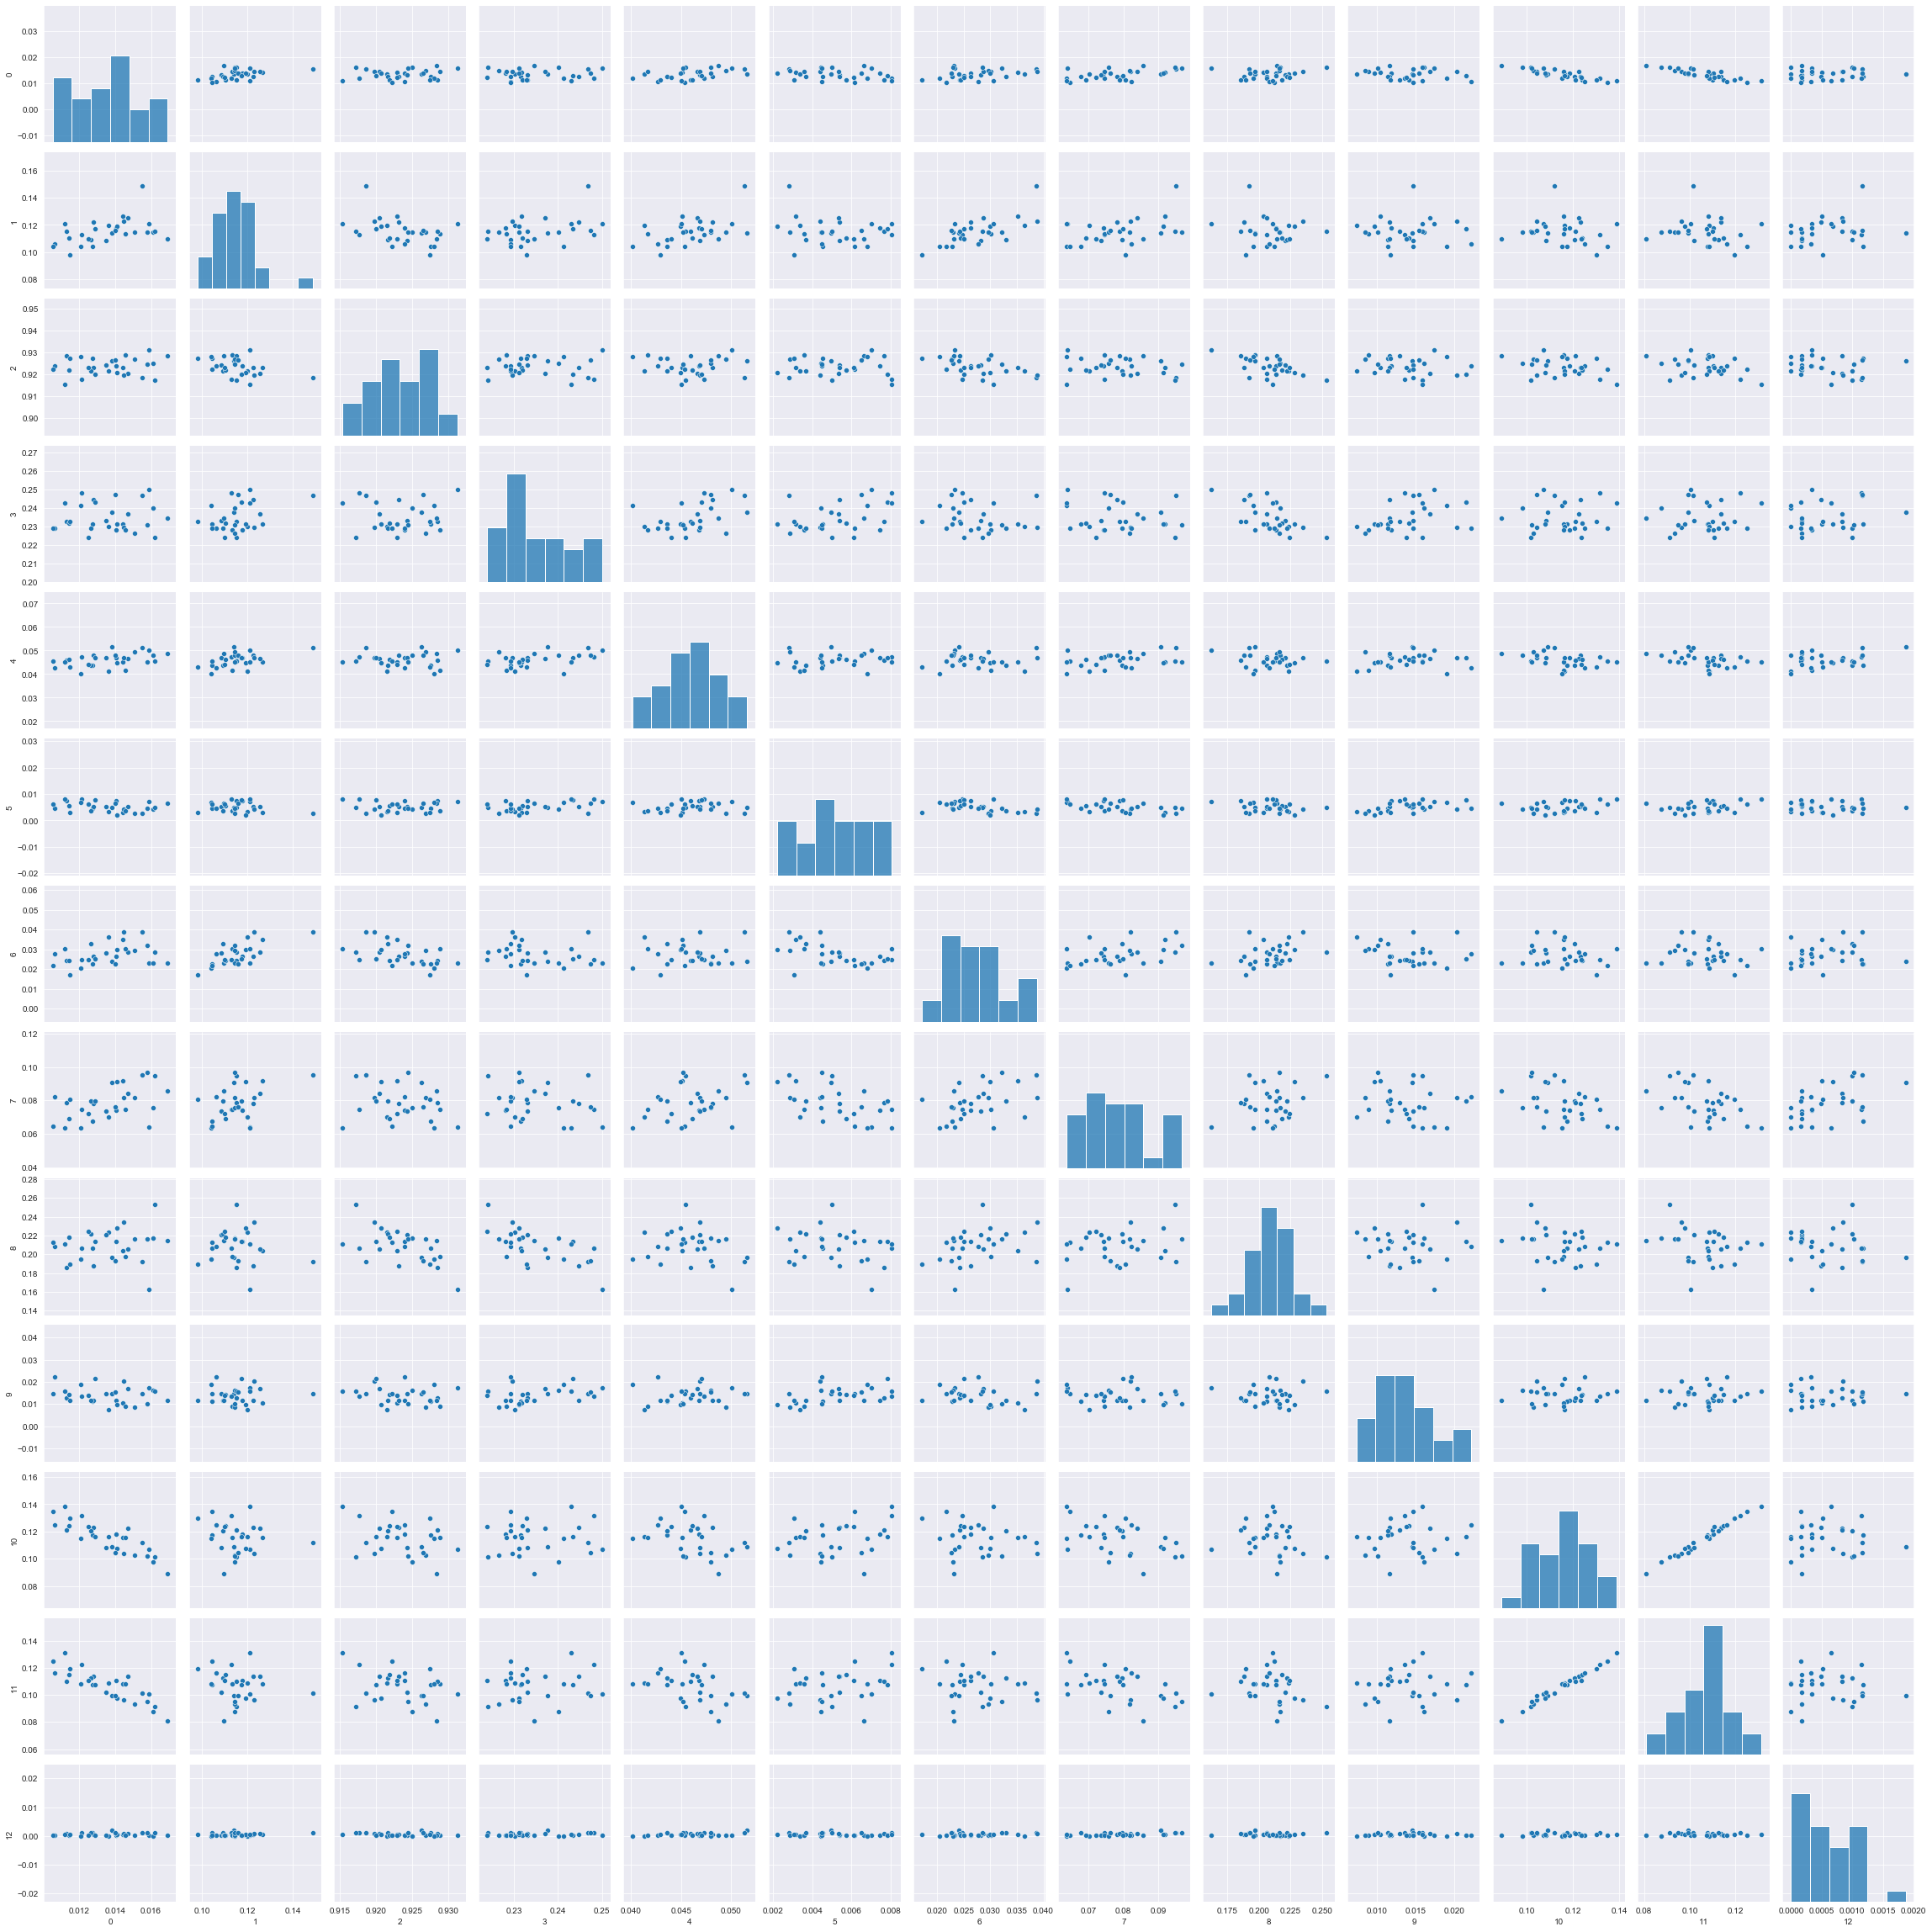

In [177]:
sns.pairplot(scale_data)

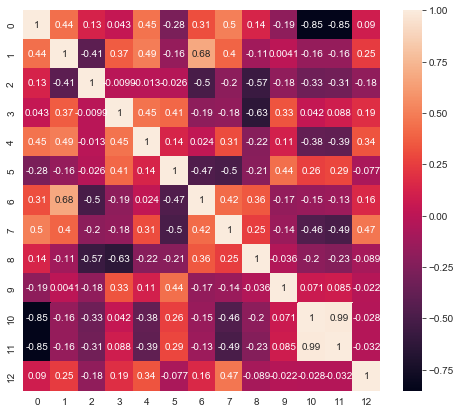

In [191]:
data1_hmap=scale_data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(data1_hmap,annot=True)
plt.show()

#### Training the model

In [189]:
x=scale_data.iloc[:,1:13]
y=scale_data.iloc[:,0]

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=30)

#### Checking the shape of Training Data

In [192]:
x_train.shape

(24, 12)

#### Checking the shape of Testing data

In [193]:
x_test.shape

(6, 12)

In [194]:
y_train.shape

(24,)

In [196]:
y_test.shape

(6,)

#### Printing the values of Training and Testing data

In [197]:
x_train

,1,2,3,4,5,6,7,8,9,10,11,12
8,0.108522,0.924287,0.233052,0.046846,0.005392,0.028141,0.073471,0.220750,0.014661,0.108185,0.101781,0.000169
6,0.126662,0.922945,0.231607,0.045094,0.003150,0.035147,0.091847,0.203423,0.010445,0.115720,0.108094,0.000497
25,0.114506,0.924459,0.231072,0.045150,0.004463,0.032103,0.096652,0.215964,0.010129,0.102145,0.094935,0.001030
4,0.112814,0.917737,0.248059,0.047320,0.008023,0.024724,0.074500,0.206143,0.013590,0.131479,0.122147,0.001146
11,0.122828,0.919777,0.229650,0.046840,0.004381,0.038752,0.081885,0.234536,0.020387,0.104126,0.096375,0.000842
22,0.104129,0.927992,0.241213,0.040089,0.006795,0.020384,0.063701,0.195349,0.019025,0.115171,0.108376,0.000000
18,0.110193,0.921918,0.231825,0.046096,0.005720,0.024394,0.069312,0.218535,0.014132,0.123988,0.114735,0.000168
19,0.106149,0.923996,0.229216,0.042626,0.004478,0.027698,0.082266,0.208152,0.022225,0.125057,0.116101,0.000332
1,0.117622,0.923908,0.227977,0.046812,0.007436,0.026364,0.074190,0.213613,0.011830,0.118298,0.110355,0.000338
16,0.114502,0.925048,0.240174,0.047969,0.004435,0.022999,0.075732,0.217175,0.016099,0.097910,0.087396,0.000000


In [198]:
y_train

8     0.013481
6     0.014424
25    0.015794
4     0.012116
11    0.014490
22    0.012061
18    0.011440
19    0.010615
1     0.014027
16    0.016099
7     0.013608
9     0.012767
3     0.012740
14    0.011275
17    0.016203
21    0.014078
2     0.013795
23    0.011465
12    0.014574
20    0.015093
27    0.012867
13    0.012634
29    0.011171
5     0.015507
Name: 0, dtype: float64

In [200]:
x_test

,1,2,3,4,5,6,7,8,9,10,11,12
15,0.109524,0.928328,0.234621,0.048752,0.006602,0.023191,0.085655,0.214477,0.011680,0.088872,0.080916,0.000169
28,0.109928,0.922888,0.223915,0.043971,0.006088,0.025030,0.072045,0.224422,0.013868,0.123627,0.110774,0.000169
26,0.115868,0.926443,0.247384,0.047945,0.006493,0.022641,0.076080,0.192946,0.015482,0.104381,0.099387,0.001165
10,0.125432,0.920444,0.237001,0.046598,0.005345,0.028727,0.084011,0.205935,0.016869,0.122425,0.113573,0.000835
24,0.104418,0.922245,0.229185,0.045370,0.006172,0.021684,0.064552,0.212505,0.014679,0.134942,0.124934,0.000167
0,0.120932,0.931209,0.250048,0.050110,0.007015,0.023218,0.063974,0.162523,0.017371,0.107068,0.100387,0.000334


In [201]:
y_test

15    0.016928
28    0.012515
26    0.013984
10    0.014698
24    0.010508
0     0.015868
Name: 0, dtype: float64

#### Fitting 1st Model with Linear Regression

In [202]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [203]:
model1.score(x_train,y_train)

0.9012439723472142

In [204]:
model1.score(x_test,y_test)

0.6731655045295677

In [205]:
y_pred1=model1.predict(x_test)

In [206]:
y_pred1

array([0.01740959, 0.0112555 , 0.01556337, 0.012615  , 0.01052691,
       0.0154901 ])

#### Identifying r2 score

In [208]:
r2_score(y_test,y_pred1)

0.6731655045295677

#### Calculating the errors

In [209]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred1)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  1.4655387964674412e-06
root mean squared error is :  0.0012105943979993635


#### Apply Regularization using Ridge

In [211]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(x_train, y_train)
y_pred2 = ridgereg.predict(x_test)

In [214]:
print('calculating the error')
# calculating mean squared error
rnd_MSE =mean_squared_error(y_test,y_pred2)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  1.4655387964675854e-06
root mean squared error is :  0.001210594397999423


#### Fitting 2nd Model with Decision Tree Regressor

In [224]:
from sklearn.tree import DecisionTreeRegressor

model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [225]:
model2.score(x_train,y_train)

1.0

In [226]:
model2.score(x_test,y_test)

0.281997169250074

In [227]:
y_pred3=model2.predict(x_test)

##### Identifying the r2 score

In [228]:
r2_score(y_test,y_pred3)


0.281997169250074

#### Predicting the Error

In [229]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred3)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  3.2195530735606117e-06
root mean squared error is :  0.0017943113089875491


In [230]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(x_train, y_train)
y_pred4 = ridgereg.predict(x_test)

In [231]:
print('calculating the error')
# calculating mean squared error
rnd_MSE =mean_squared_error(y_test,y_pred4)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  1.4655387964675854e-06
root mean squared error is :  0.001210594397999423


#### Loading and Saving the model

# Saving the best model between 2 - Linear Regression

In [232]:
import pickle

In [233]:
with open('model1_baseball','wb') as files:
    pickle.dump(model1, files)